# Example: Clothes Classification Using Fashion_MNIST dataset


We welcome you to this section 1 that is about image classification with machine learning.

We will introduce chemistry students to image classification with machine learning. In this example, we will introduce the basic Convolutional neural network (CNN) model to classify Fashion_MNIST dataset, which contains 28x28 grayscale images of 10 fashion categories. From this notebook, you will understand the basic workflow to train and evaluate the model and use the model to predict clothes categories (inference).


## Table of content

* Load images dataset
* Data preparation
* Build and train the model
* Evaluate the model
* Inference

# Load images dataset

At the begining, we will directly load the Fashion_MNIST dataset from keras. Fashion_MNIST is a popular dataset that is used for image classification. More details about this dataset can be found on the website: https://keras.io/api/datasets/fashion_mnist/.


In [ ]:
# import packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


# Data preparation

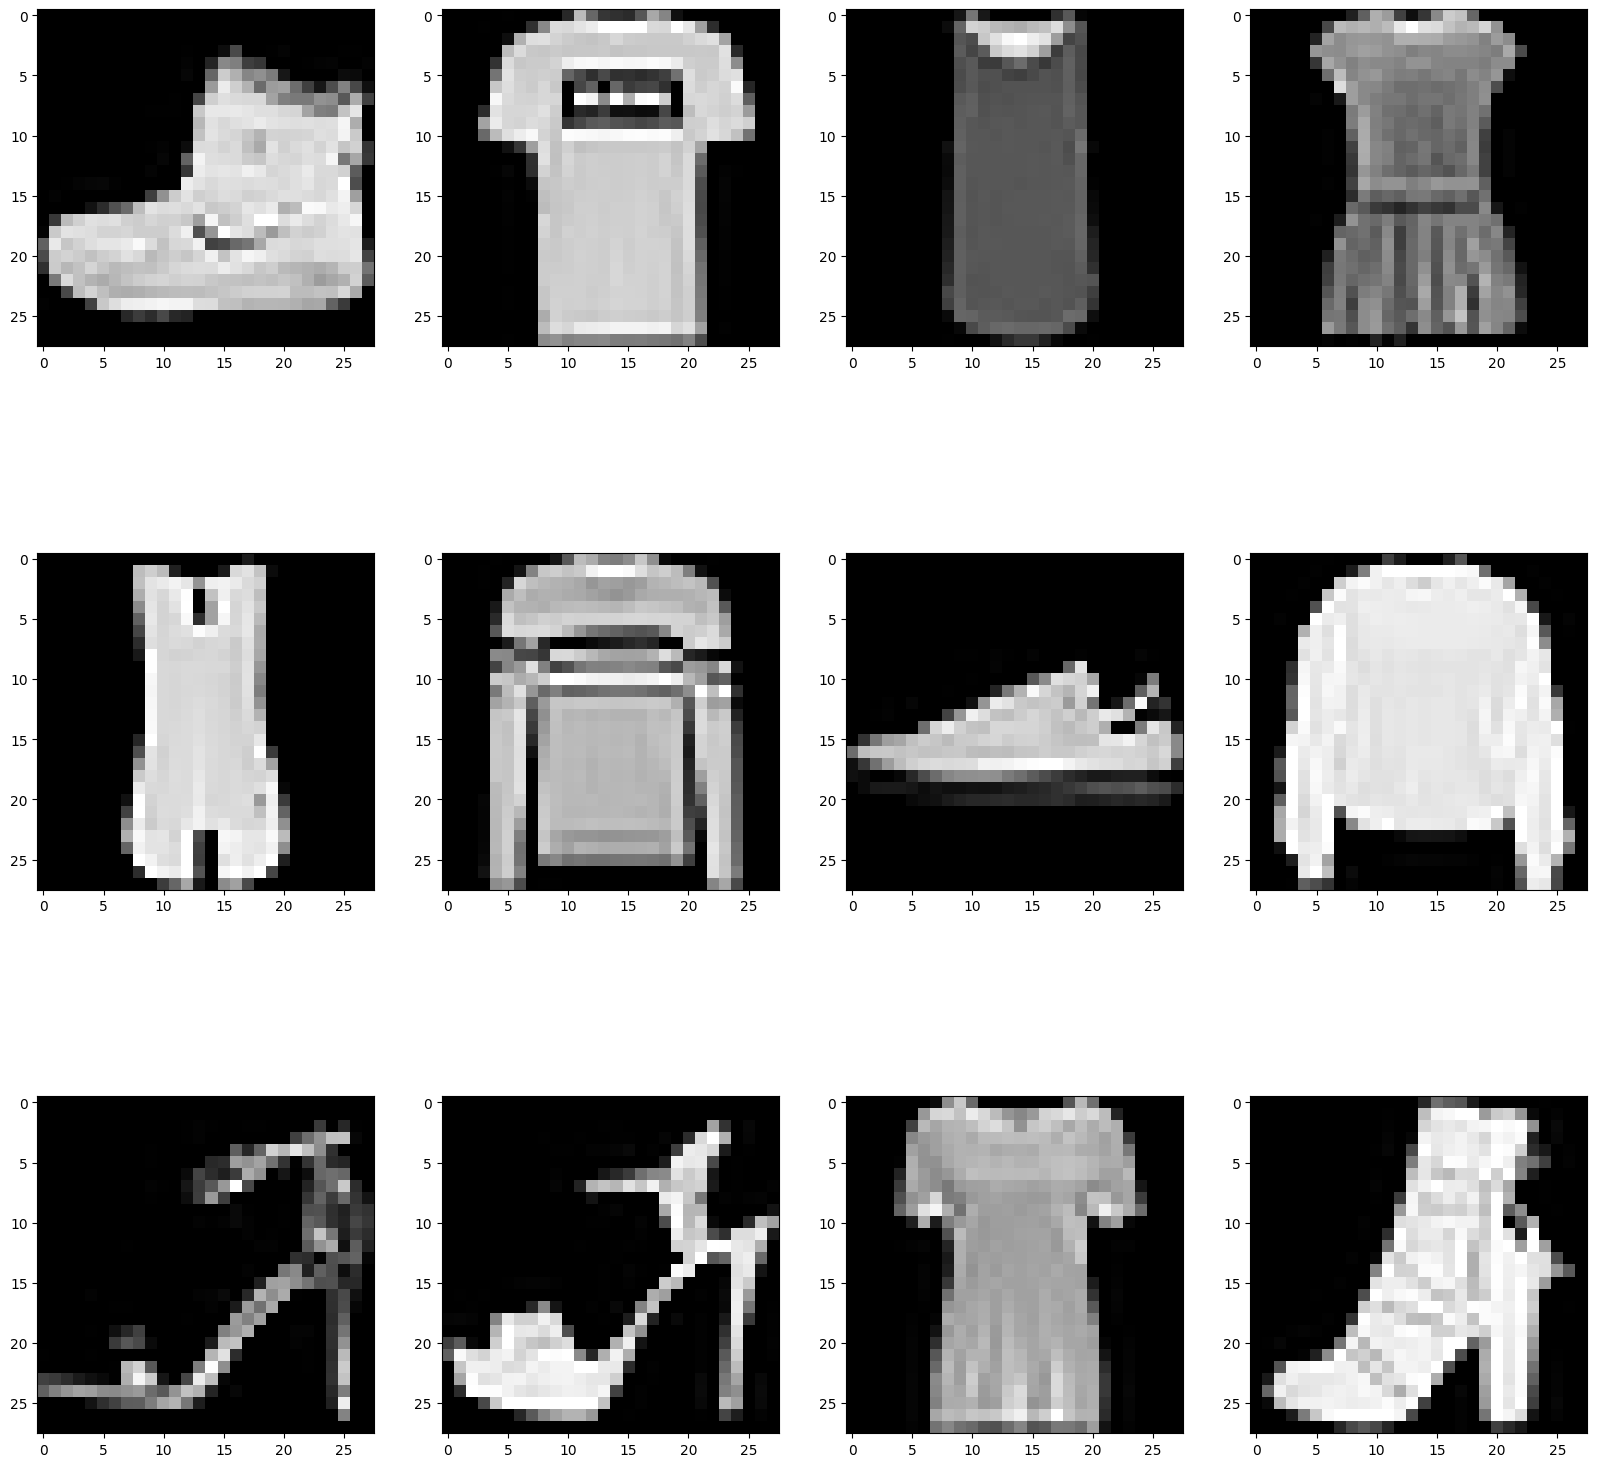

In [ ]:
# Visualize the dataset
fig,axes = plt.subplots(3,4,figsize=(20, 20))

j = 0
for i,img in enumerate(X_train_full[:12]):
    axes[i//4,j%4].imshow(img, cmap='gray')
    j+=1

In [ ]:
# Data preparation

# split the X_train_full into X_train and X_valid
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# normalize the dataset
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train_norm = (X_train - X_mean) / X_std
X_valid_norm = (X_valid - X_mean) / X_std
X_test_norm = (X_test - X_mean) / X_std

X_train_norm = X_train_norm[..., np.newaxis]
X_valid_norm = X_valid_norm[..., np.newaxis]
X_test_norm = X_test_norm[..., np.newaxis]

# Build and train the model

Simple convolustional neural network (CNN) is used to train the model. It is usually composed of different layers in keras. The Layers are the basic building blocks of neural networks in Keras. Those layers are composed of and can be referred in Keras doc: convolutional layers (https://keras.io/api/layers/convolution_layers/convolution2d/), pooling layer (https://keras.io/api/layers/pooling_layers/), input and dense layer (https://keras.io/api/layers/core_layers/), flatten layer (https://keras.io/api/layers/reshaping_layers/flatten/). The layer or CNN structure can refer to example in keras doc ( https://keras.io/examples/vision/mnist_convnet/) or related books (such as • Géron, A., 2019. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".).

In [ ]:
# Build the model (sequential CNN model)
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training. For more available loss function, refer keras doc: https://keras.io/api/losses/

An optimizer is a function that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy. For more available optimizer, refer keras doc: https://keras.io/api/optimizers/

A metric is a function that is used to judge the performance of your model. For more available metrics, refer keras doc: https://keras.io/api/metrics/

In [ ]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

Then we will start to train the model by calling model.fit() and save the model by calling model.save(). More information about these two functions are in the Keras doc: https://keras.io/api/models/.

In [ ]:
# Train the model
history = model.fit(X_train_norm, y_train, epochs=20, validation_data=[X_valid_norm, y_valid])

Epoch 1/20
1719/1719 [==============================] - 31s 10ms/step - loss: 0.7116 - accuracy: 0.7558 - val_loss: 0.3579 - val_accuracy: 0.8684
Epoch 2/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4280 - accuracy: 0.8565 - val_loss: 0.3412 - val_accuracy: 0.8780
Epoch 3/20
1719/1719 [==============================] - 20s 11ms/step - loss: 0.3726 - accuracy: 0.8751 - val_loss: 0.3247 - val_accuracy: 0.8858
Epoch 4/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3380 - accuracy: 0.8869 - val_loss: 0.3045 - val_accuracy: 0.8920
Epoch 5/20
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3131 - accuracy: 0.8944 - val_loss: 0.2876 - val_accuracy: 0.8982
Epoch 6/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2993 - accuracy: 0.8990 - val_loss: 0.2925 - val_accuracy: 0.9004
Epoch 7/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2808 - accuracy: 0.9054 - val_loss: 0.2722 - val_

# Evaluate the model

In [ ]:
# visualize the model structure with model.summary(). Feel free to comment out the code below to visualize the model structure

# model.summary()

The test dataset is not used for training and validation, which means the images are new to the trained model. We will use it to get the performance of the model. The performance is acceptable because the accuracy for the test dataset is nearly the same as the accuracy for the train and validation dataset.

In [ ]:
# Using test dataset to evaluate loss and accuracy for trained model
results = model.evaluate(X_test_norm, y_test, batch_size=128)

79/79 [==============================] - 1s 8ms/step - loss: 0.3435 - accuracy: 0.9023


At the end of epoch, the accuary of trainning dataset and validation dataset should be close. This is an easy way to determine if there is overfitting or not.

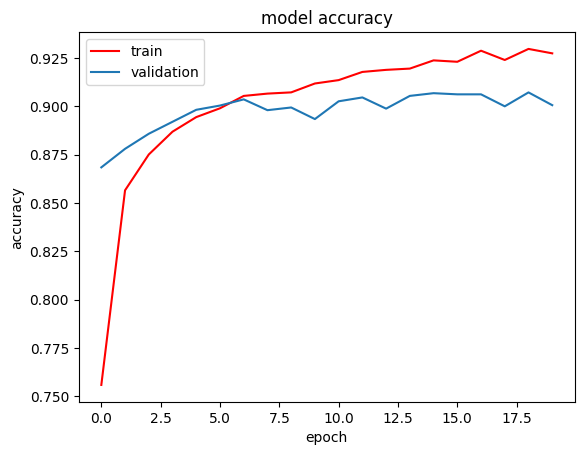

In [ ]:
# plot accuracy vs epoch
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Inference

We visualize the image and use our judgement to see what piece of clothes it is and then compare it to the model prediction.



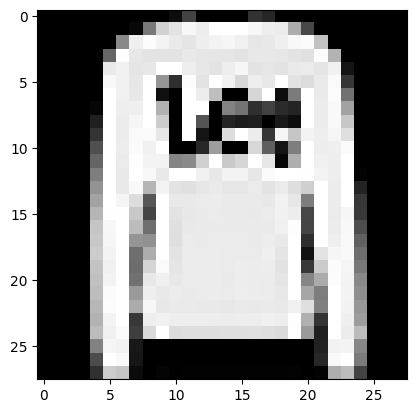

In [ ]:
# Visualize one image, X_test[x]. Here we choose X_test[1]. You can choose any of the images among all test dataset (10,000 images)

inference_image_number = 1  # Choose the number from 0-9,999 (amount of test dataset)!
img1 = X_test[inference_image_number]
plt.imshow(img1, cmap='gray')

The class labels are collected from the website: https://keras.io/api/datasets/fashion_mnist/. Then we will predict the image above with model.predict() function to see if it matches with your judgement. Check the model.predict() reference: https://keras.io/api/models/model_training_apis/#predict-method

In [ ]:
class_label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# image process
x = np.squeeze(X_test_norm[inference_image_number])
x = np.expand_dims(x, axis=0)

# predict the X_test[1] with model.predict()
y_prob = model.predict(x)
print("probability for each of the catogaries: ", y_prob)
y_class = y_prob.argmax(axis=-1)
# print("cloth index", y_class)
print("cloth catogaries the model predict: ", class_label[y_class[0]])

1/1 [==============================] - 0s 19ms/step
probability for each of the catogaries:  [[2.5850845e-12 9.4751580e-32 9.9999428e-01 7.4611686e-19 3.2163416e-09
  0.0000000e+00 5.7780335e-06 0.0000000e+00 6.0961815e-27 0.0000000e+00]]
cloth catogaries the model predict:  Pullover
